# Предобработка данных квартир

In [209]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Загрузка данных
df = pd.read_csv('data_lab_1.csv')
df.head()



,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.0,3,2.70,16.0,51.0,8,False,25.0,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.4,1,NaN,11.0,18.6,1,False,11.0,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.0,2,NaN,5.0,34.3,4,False,8.3,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.0,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.0,2,3.03,14.0,32.0,13,False,41.0,NaN,31856.0,8098.0,112.0,48.0


## Проверка соответствия типов данных
Обоснование: числовые признаки должны иметь корректный тип для анализа и моделей.

In [210]:
# Проверим типы
print(df.dtypes)

# Преобразуем булевы признаки
if 'studio' in df.columns:
    df['studio'] = df['studio'].astype(bool)

# Проверим числовые признаки
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Числовые:", num_cols)
print("Категориальные:", cat_cols)


price                float64
total_area           float64
rooms                  int64
ceiling_height       float64
floors_total         float64
living_area          float64
floor                  int64
studio                  bool
kitchen_area         float64
balcony              float64
airports_distance    float64
centers_distance     float64
parks_nearest        float64
ponds_nearest        float64
dtype: object
Числовые: ['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_distance', 'centers_distance', 'parks_nearest', 'ponds_nearest']
Категориальные: ['studio']


## Обработка пропущенных значений
Обоснование: среднее для числовых, мода для категориальных

In [ ]:

print(df.isnull().sum())

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())


price                    0
total_area               0
rooms                    0
ceiling_height        9195
floors_total            86
living_area           1903
floor                    0
studio                   0
kitchen_area          2278
balcony              11519
airports_distance     5542
centers_distance      5519
parks_nearest        15620
ponds_nearest        14589
dtype: int64
price                0
total_area           0
rooms                0
ceiling_height       0
floors_total         0
living_area          0
floor                0
studio               0
kitchen_area         0
balcony              0
airports_distance    0
centers_distance     0
parks_nearest        0
ponds_nearest        0
dtype: int64


C:\Users\roma\AppData\Local\Temp\ipykernel_24476\3031433030.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\roma\AppData\Local\Temp\ipykernel_24476\3031433030.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

## Обработка дубликатов
Обоснование: дубликаты искажают статистику.

In [212]:

df = df.drop_duplicates().reset_index(drop=True)
df.shape



(23697, 14)

## Обработка выбросов
Жёстко фильтруем по экономически разумным границам

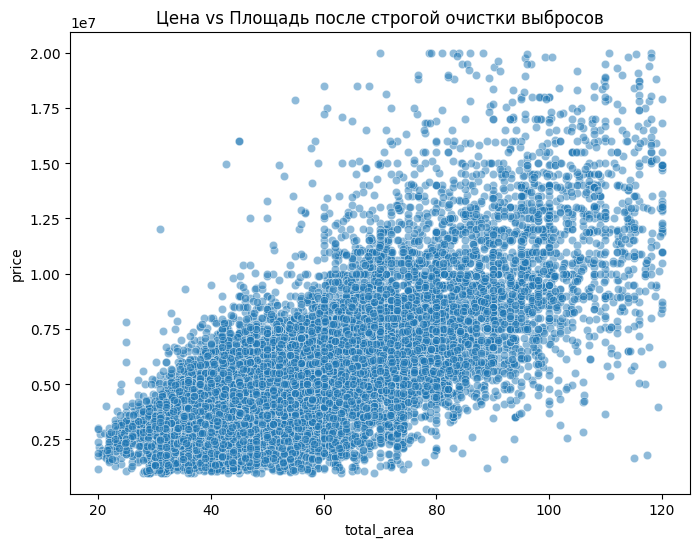

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt


df = df[
    (df['total_area'].between(20, 120)) &
    (df['price'].between(1_000_000, 20_000_000)) &
    (df['ceiling_height'].between(2.3, 3.5)) &
    (df['rooms'].between(1, 5))
].copy()


plt.figure(figsize=(8,6))
sns.scatterplot(x=df['total_area'], y=df['price'], alpha=0.5)
plt.title('Цена vs Площадь после строгой очистки выбросов')
plt.show()


## Кодирование категориальных признаков
В данной ситуации lable инкодинг подходит

In [214]:

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])



In [215]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,21808.0,5.250445e+06,2.847602e+06,1000000.0,3400000.00,4500000.00,6300000.00,20000000.0
total_area,21808.0,5.474531e+01,1.951400e+01,20.0,40.00,50.60,65.80,120.0
rooms,21808.0,1.971203e+00,8.897576e-01,1.0,1.00,2.00,3.00,5.0
ceiling_height,21808.0,2.671852e+00,1.606841e-01,2.3,2.60,2.65,2.70,3.5
floors_total,21808.0,1.085615e+01,6.602087e+00,1.0,5.00,9.00,16.00,60.0
living_area,21808.0,3.114202e+01,1.308912e+01,2.0,19.00,30.00,39.20,100.0
floor,21808.0,5.950981e+00,4.913843e+00,1.0,2.00,4.00,8.00,33.0
studio,21808.0,5.044021e-04,2.245375e-02,0.0,0.00,0.00,0.00,1.0
kitchen_area,21808.0,9.837024e+00,4.135354e+00,1.3,7.10,9.10,11.00,64.0
balcony,21808.0,1.078274e+00,7.685102e-01,0.0,1.00,1.00,1.00,5.0


масштабирвание

In [216]:
# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])
#Если добавить масштабирвание падает R^2(((

Добавление новвых признаков

In [217]:

df['price_per_m2'] = df['price'] / df['total_area'] # важный признак + было на лекции

df['living_ratio'] = df['living_area'] / df['total_area'] # показывает планировку

df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']# показывает планировку

df['floor_ratio'] = df['floor'] / df['floors_total']# относительный этаж тоже может влиять на цену


Оценка влияния признаков на стоимость

price                1.000000
total_area           0.735359
price_per_m2         0.686109
living_area          0.568428
kitchen_area         0.518577
rooms                0.437225
ceiling_height       0.388172
floors_total         0.153824
floor                0.112449
balcony              0.099381
parks_nearest        0.076187
airports_distance    0.005001
floor_ratio         -0.000895
studio              -0.019404
ponds_nearest       -0.036327
living_ratio        -0.082930
kitchen_ratio       -0.134649
centers_distance    -0.264026
Name: price, dtype: float64


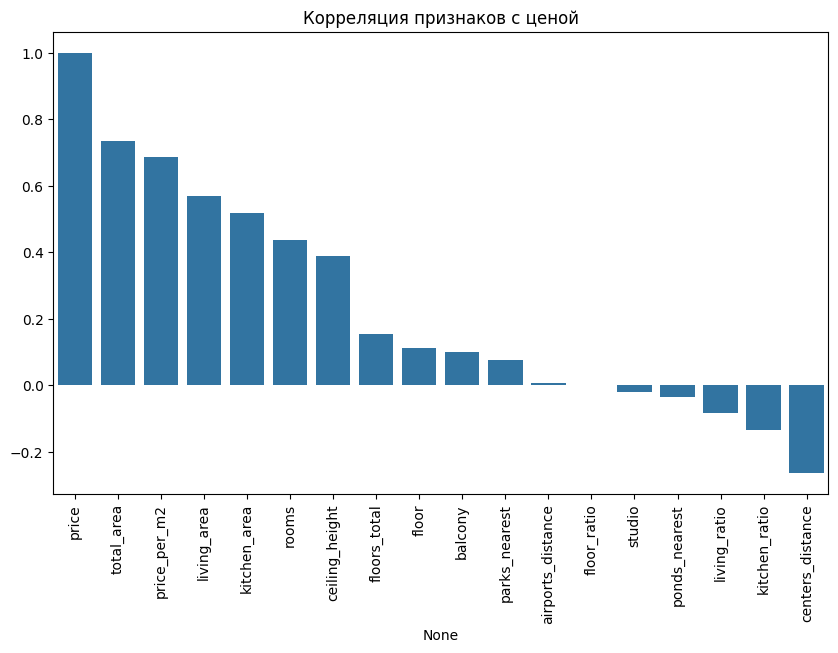

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Корреляция числовых признаков с ценой
corr = df.corr()['price'].sort_values(ascending=False)
print(corr)

# Визуализация
plt.figure(figsize=(10,6))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title('Корреляция признаков с ценой')
plt.show()


In [219]:
# Отбираем признаки, где корреляция > 0.3 по модулю
important_features = corr[abs(corr) > 0.3].index.tolist()
important_features.remove('price')  # исключаем целевую
print("Значимые признаки:", important_features)

# Формируем датафрейм для модели
X = df[important_features]
y = df['price']


Значимые признаки: ['total_area', 'price_per_m2', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height']


Проверка значимости для модели

In [220]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X, y)

# Коэффициенты важности
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print(importance)


total_area        104630.182111
kitchen_area        8267.747143
living_area         2044.529312
price_per_m2          56.687037
ceiling_height      -507.180309
rooms            -140343.563108
dtype: float64


Попытка выделить группы, внутри которых влияние характеристик на цену различаются между группами.

In [221]:
from sklearn.cluster import KMeans

# Используем числовые признаки, кроме самой цены
features_for_cluster = df.select_dtypes(include=['float64', 'int64']).drop(columns=['price'], errors='ignore')

# Обучим модель кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_for_cluster)

df['cluster'].value_counts()


cluster
1    12030
2     6117
0     3661
Name: count, dtype: int64

визуализация групп

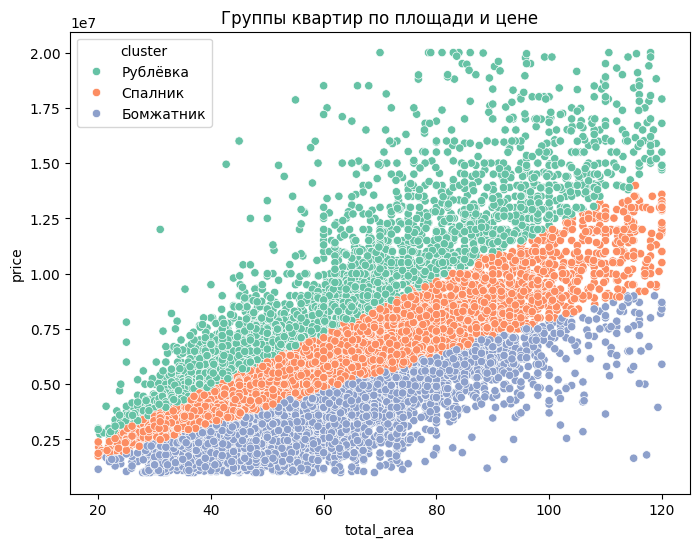

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
ax =sns.scatterplot(
    x=df['total_area'],
    y=df['price'],
    hue=df['cluster'],
    palette='Set2'
)
new_labels = ['Рублёвка', 'Спалник', 'Бомжатник']
for t, new_label in zip(ax.legend_.texts, new_labels):
    t.set_text(new_label)
plt.title('Группы квартир по площади и цене')
plt.show()


Влияние признака внутри групп

In [223]:
group_corrs = df.groupby('cluster').apply(lambda x: x.corr()['price'].sort_values(ascending=False))
group_corrs


C:\Users\roma\AppData\Local\Temp\ipykernel_24476\3760929550.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_corrs = df.groupby('cluster').apply(lambda x: x.corr()['price'].sort_values(ascending=False))


cluster                   
0        price                1.000000
         total_area           0.910810
         living_area          0.766882
         rooms                0.733484
         kitchen_area         0.504759
         price_per_m2         0.479577
         ceiling_height       0.282701
         balcony              0.074686
         parks_nearest        0.057118
         floor_ratio          0.047382
         airports_distance    0.021894
         living_ratio         0.001637
         studio              -0.028004
         ponds_nearest       -0.097831
         floor               -0.102106
         floors_total        -0.166453
         centers_distance    -0.198276
         kitchen_ratio       -0.326400
         cluster                   NaN
1        price                1.000000
         total_area           0.944744
         living_area          0.819213
         rooms                0.724993
         kitchen_area         0.464645
         ceiling_height       0.36360

Подготовка данных

In [224]:
from sklearn.model_selection import train_test_split

# Целевая переменная
y = df['price']

# Признаки
X = df.drop(columns=['price', 'price_per_m2'], errors='ignore')

# Разделим на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Линейная реграссия Дёшево и сердито

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.8614170734901758
MAE: 730228.7897731913
RMSE: 1038579.347347809


Дерево решений

In [233]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("R²:", r2_score(y_test, y_pred_tree))
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))


R²: 0.8886608436006712
MAE: 653942.2091948225
RMSE: 930912.3271154041
